<a href="https://colab.research.google.com/github/sandroormeno/Supervised-learning-MeetUp-Galileo/blob/main/2 perceptrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(784, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ht = model.fit(x_train, y_train, batch_size= 64, epochs=10 ,verbose=2 , validation_data= (x_test, y_test))

Epoch 1/10
938/938 - 4s - loss: 0.2108 - accuracy: 0.9384 - val_loss: 0.1016 - val_accuracy: 0.9690
Epoch 2/10
938/938 - 4s - loss: 0.0819 - accuracy: 0.9747 - val_loss: 0.0788 - val_accuracy: 0.9761
Epoch 3/10
938/938 - 4s - loss: 0.0526 - accuracy: 0.9840 - val_loss: 0.0782 - val_accuracy: 0.9742
Epoch 4/10
938/938 - 4s - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.0635 - val_accuracy: 0.9806
Epoch 5/10
938/938 - 4s - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0649 - val_accuracy: 0.9793
Epoch 6/10
938/938 - 4s - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0659 - val_accuracy: 0.9797
Epoch 7/10
938/938 - 4s - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0656 - val_accuracy: 0.9824
Epoch 8/10
938/938 - 4s - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0770 - val_accuracy: 0.9794
Epoch 9/10
938/938 - 4s - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0800 - val_accuracy: 0.9792
Epoch 10/10
938/938 - 4s - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.0795 - val_accuracy: 0.9806

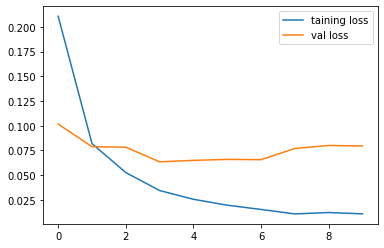

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.figure()
plt.plot(np.arange(0,10,), ht.history['loss'], label='taining loss')
plt.plot(np.arange(0,10,), ht.history['val_loss'], label='val loss')
plt.legend(loc='upper right')
plt.show()

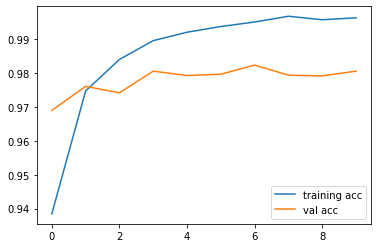

In [ ]:
plt.figure()
plt.plot(np.arange(0,10,), ht.history['accuracy'], label='training acc')
plt.plot(np.arange(0,10,), ht.history['val_accuracy'], label='val acc')
plt.legend(loc='lower right')
plt.show()

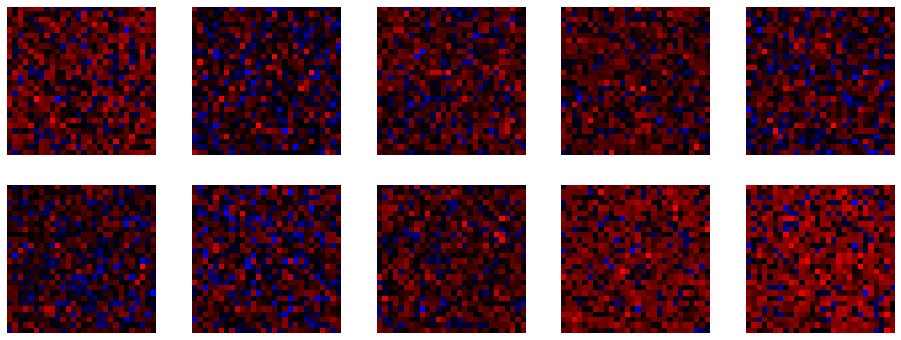

In [ ]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'blue'),
                                                    (0.5, 'black'),
                                                    (1, 'red')])
capa = model.layers[-1].get_weights()

f, axes = plt.subplots(2, 5, figsize=(16,6))
for i in range(10):
    axes.ravel()[i].imshow(np.asarray(capa[0][:,i]).reshape((28,28)), cmap=cmap)
    axes.ravel()[i].axis('off')
plt.show()